In [2]:
import numpy as np
from scipy import stats
from sklearn.metrics import f1_score
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
X_orig = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
Y_True = np.array([0,    0,    0,    0,    0,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    1,    1,    1,    1,    1])

In [28]:
# split on
X_orig = X_orig[2:19]
Y_True = Y_True[2:19]

In [29]:
# y = mx + b, b is constant here
X = sm.add_constant(X_orig)

In [30]:
model = Logit(Y_True, X).fit_regularized(disp=False)

In [31]:
y_pred = model.predict(X)
y_out = y_pred

In [32]:
# y_pred[y_pred > 0.5] = 1
# y_pred[y_pred <= 0.5] = 0

In [33]:
y_pred

array([0.08435069, 0.11582111, 0.15701937, 0.20940147, 0.20940147,
       0.27358697, 0.34876746, 0.43231221, 0.51989305, 0.60626809,
       0.68647482, 0.75689437, 0.86292544, 0.89951444, 0.92716122,
       0.94764422, 0.96259954])

In [35]:
# f1_score(Y_True, y_pred)

In [36]:
cov = model.cov_params()

In [37]:
gradient = (y_out * (1 - y_out) * X.T).T

In [38]:
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])

  	Z
80% 	1.282
85% 	1.440
90% 	1.645
95% 	1.960
99% 	2.576
99.5% 	2.807
99.9% 	3.291

In [39]:
c = 1.282 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, y_out + std_errors * c))
lower = np.maximum(0, np.minimum(1, y_out - std_errors * c))

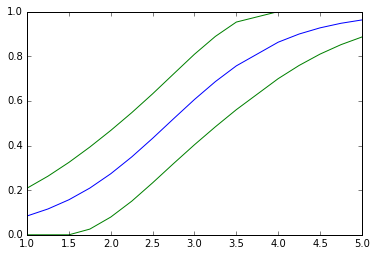

In [40]:
plt.plot(X_orig, y_out)
plt.plot(X_orig, lower, color='g')
plt.plot(X_orig, upper, color='g')
plt.show()

In [41]:
preds = []
N = 1000
for i in range(N):
    idx = np.random.choice(range(len(y_out)), size=len(y_out))
    try:
        model = sm.Logit(Y_True[idx], X[idx]).fit_regularized(disp=False)
        pred = model.predict(X)
        cov = model.cov_params()
        gradient = (pred * (1 - pred) * X.T).T
        std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
        c = 1.282 # multiplier for confidence interval
        upper = np.maximum(0, np.minimum(1, pred + std_errors * c))
        lower = np.maximum(0, np.minimum(1, pred - std_errors * c))
        preds.append([lower, pred, upper])
    except:
        pass

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


In [42]:
np.random.choice(range(len(y_out)), size=100000)

array([6, 3, 2, ..., 1, 3, 5])

In [43]:
p = np.array(preds)
p = np.nan_to_num(p)

In [44]:
np.mean(p[:,0,:], 0)

array([0.00473507, 0.01213839, 0.02760291, 0.06073905, 0.06073905,
       0.11173017, 0.17675722, 0.2493013 , 0.33239637, 0.41503498,
       0.50129803, 0.57722938, 0.71045857, 0.76506589, 0.80545829,
       0.83825915, 0.86496038])

In [45]:
p[:,0,:]

array([[0.        , 0.        , 0.        , ..., 0.98285587, 0.99011268,
        0.99433139],
       [0.        , 0.        , 0.        , ..., 0.84841968, 0.89236148,
        0.92477321],
       [0.        , 0.        , 0.        , ..., 0.99823863, 0.99922236,
        0.99965884],
       ...,
       [0.        , 0.        , 0.        , ..., 0.65411745, 0.71129586,
        0.76285906],
       [0.03504911, 0.12399825, 0.22556049, ..., 0.89297432, 0.91286426,
        0.92950306],
       [0.        , 0.        , 0.        , ..., 0.83799401, 0.87778127,
        0.90892592]])

## Bootstrap

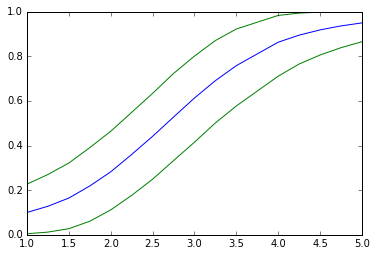

In [46]:
plt.plot(X_orig, np.mean(p[:,1,:], 0))
plt.plot(X_orig, np.mean(p[:,0,:], 0), 'g')
plt.plot(X_orig, np.mean(p[:,2,:], 0), 'g')
plt.show()

## Original

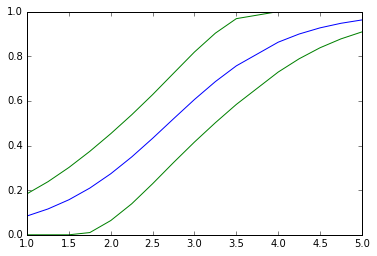

In [47]:
plt.plot(X_orig, y_out)
plt.plot(X_orig, lower, color='g')
plt.plot(X_orig, upper, color='g')
plt.show()